In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from os.path import join, expanduser, basename
from invert import invert_sd, epsilon_density

In [2]:
with open(expanduser(f'~/uavsar/results/uavsar_snotel_sd/res_df'), 'rb') as f:
    res = pickle.load(f)
res_vv = res[res.pol == 'VV']

In [4]:
res_vv

first_dt                 second_dt pol result
0 2020-02-12 22:30:03+00:00 2020-02-19 22:24:14+00:00  VV     {}

Text(0, 0.5, 'Uavsar Snow Depth Change')

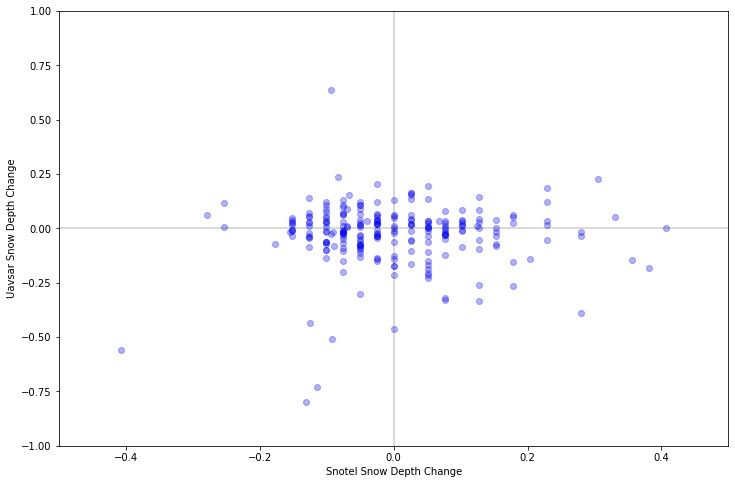

In [72]:
f, ax = plt.subplots(figsize = (12,8))
for i,r in res_vv.iterrows():
    if r.meso_result:
        for stat in r.meso_result:
            obs = r.meso_result[stat]
            sds = obs['snow_depths']
            sds = [s for s in sds if s is not None]            
            if obs['snow_depth_unit'] == 'Millimeters':
                sds = [s/1000 for s in sds]
            if obs['snow_depth_unit'] == 'Centimeters':
                sds = [s/100 for s in sds]
            swes = obs['swes']
            swes = [s for s in swes if s is not None]            
            if obs['snow_water_equiv_unit'] == 'Millimeters':
                swes = [s/1000 for s in swes]
            if obs['snow_water_equiv_unit'] == 'Centimeters':
                swes = [s/100 for s in swes]
            
            sd_delta = sds[-1] - sds[0]
            density = swes[0]/sds[0]
            
            sd_density = invert_sd(obs['phase'], obs['inc'], epsilon = epsilon_density(density))
            us_delta = np.nanmedian(obs['uavsar_sd_delta'])
            us_delta = np.nanmedian(sd_density)
            plt.scatter(sd_delta, us_delta, alpha = 0.3, color = 'blue')
plt.xlim(-0.5, 0.5)
plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel Snow Depth Change')
plt.ylabel('Uavsar Snow Depth Change')

In [76]:
swe_delta = swes[-1]- swes[0] 
swe_delta / sd_delta

-0.06451612903225858

In [84]:
obs['snow_water_equiv_unit']

'Millimeters'

In [85]:
obs['snow_depth_unit']

'Millimeters'

In [81]:
sds[0]

1.2758420000000001

In [83]:
swes[0]*100

0.1016

In [80]:
sds[0]/swes[0]

1255.7500000000002

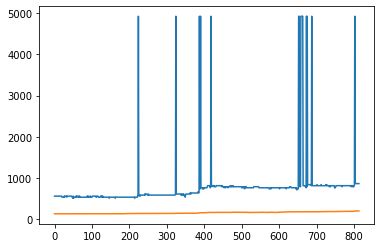

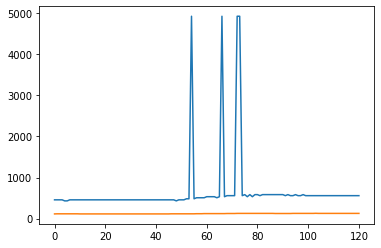

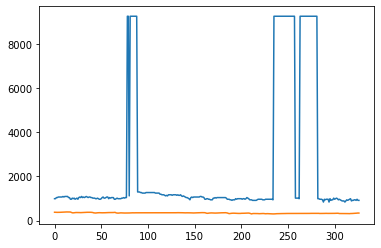

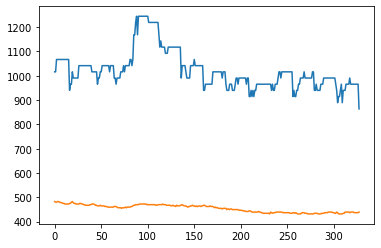

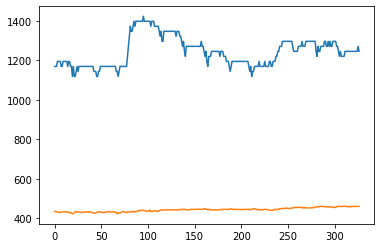

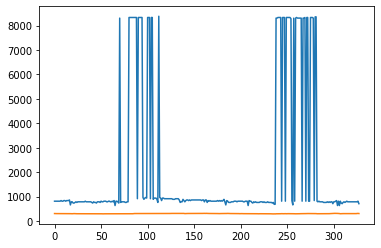

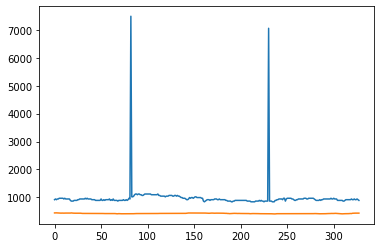

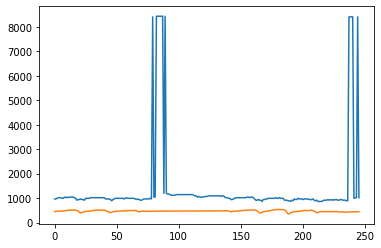

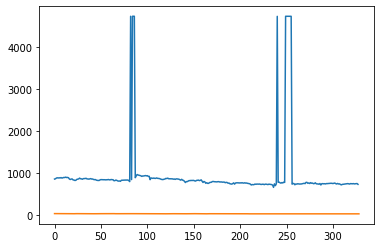

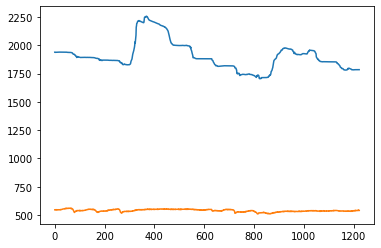

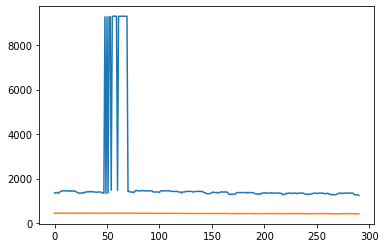

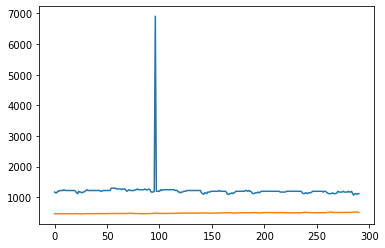

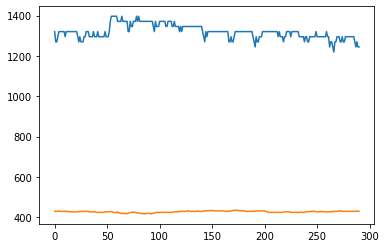

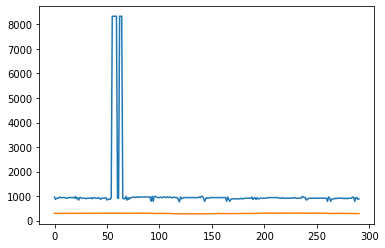

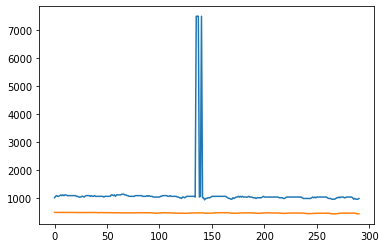

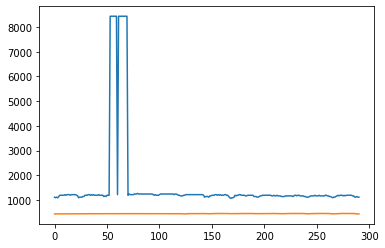

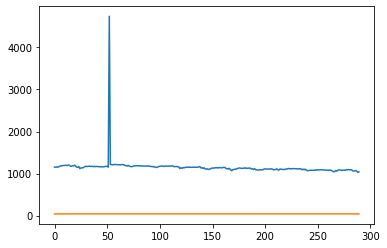

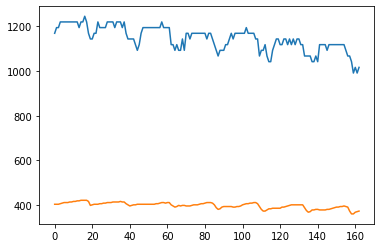

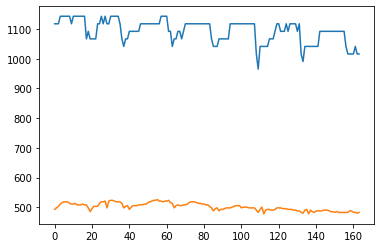

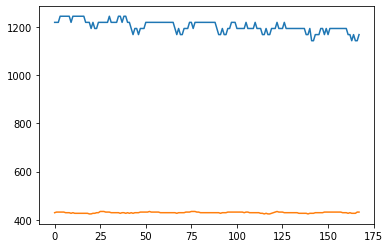

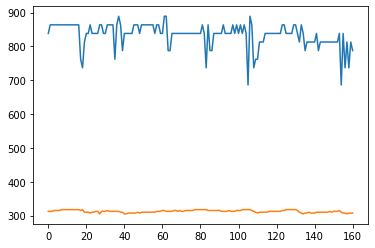

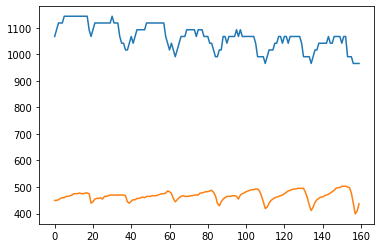

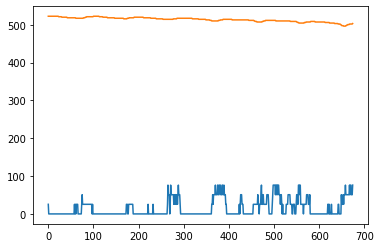

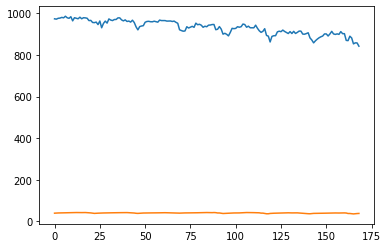

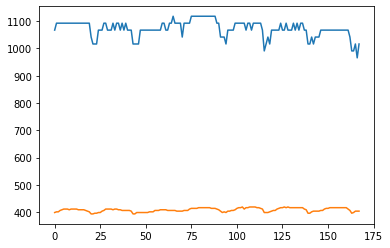

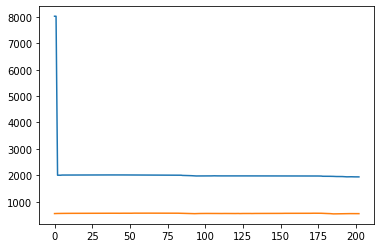

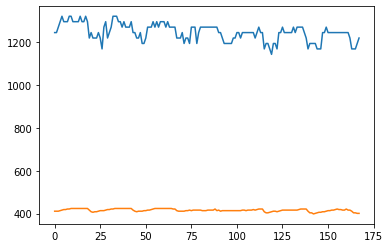

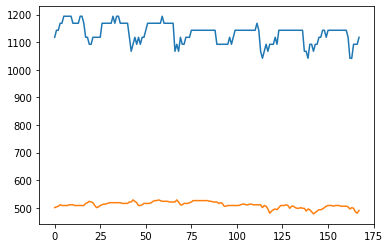

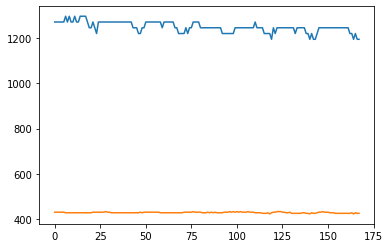

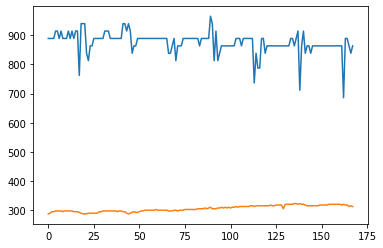

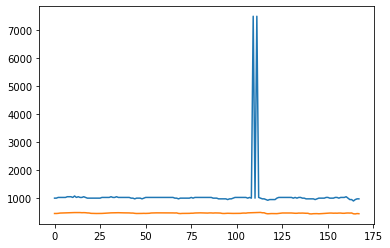

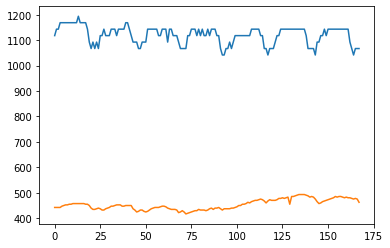

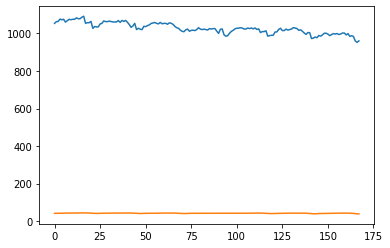

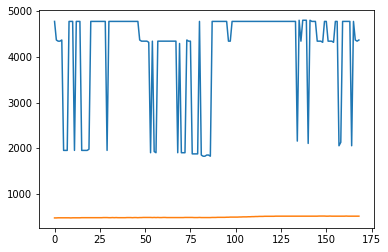

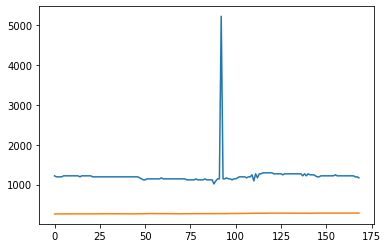

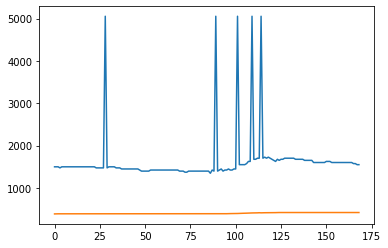

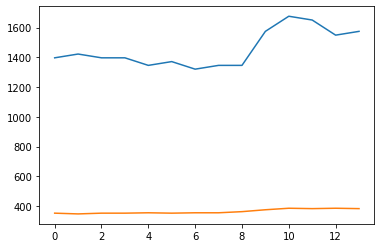

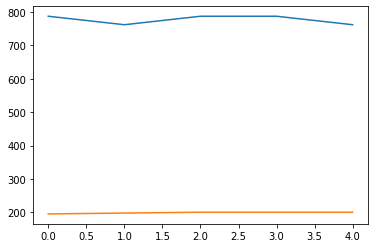

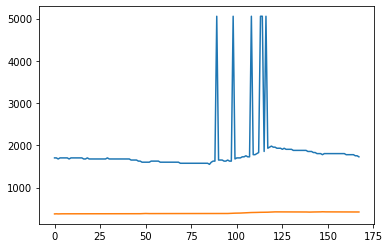

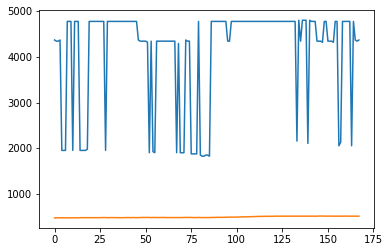

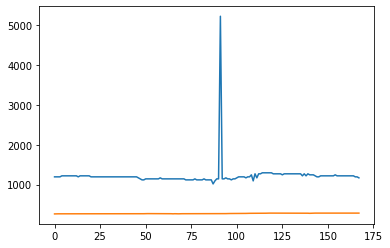

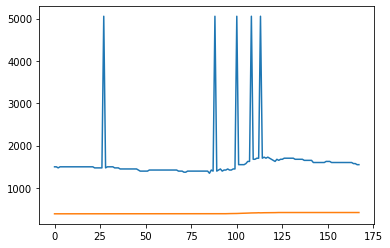

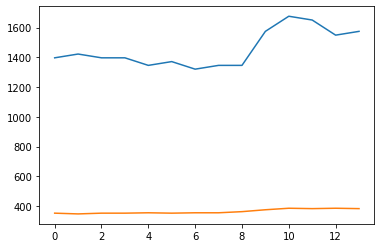

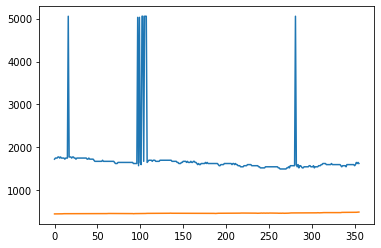

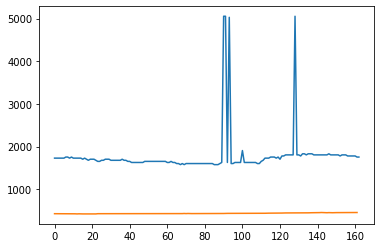

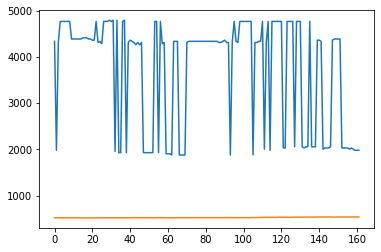

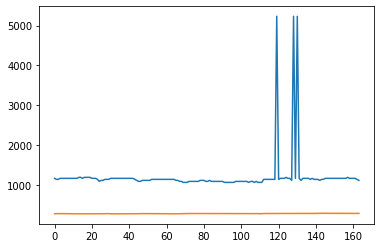

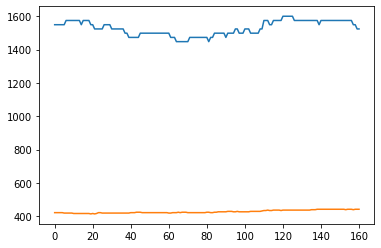

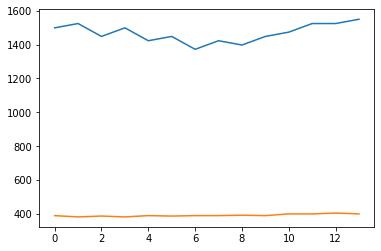

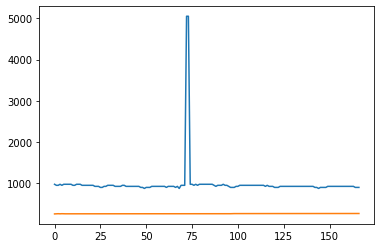

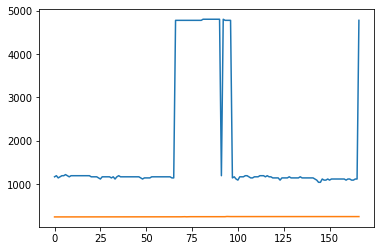

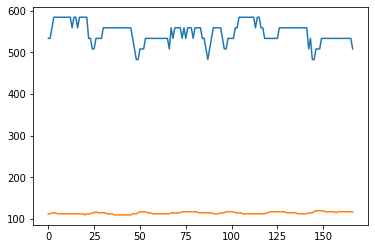

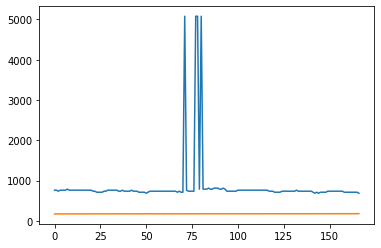

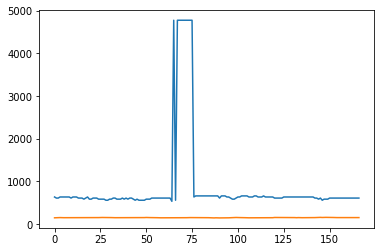

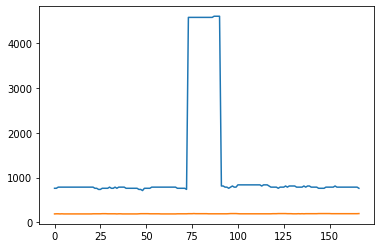

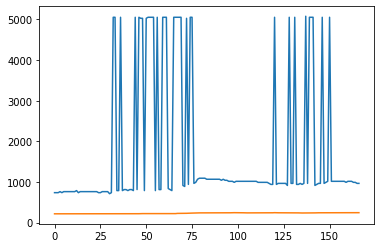

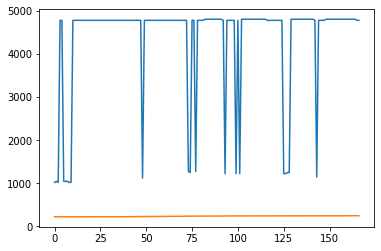

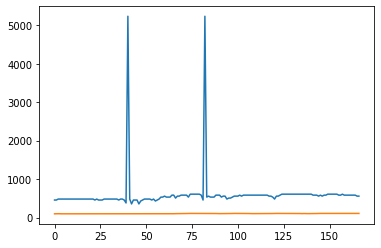

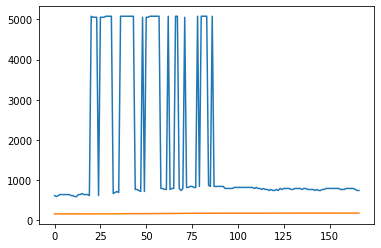

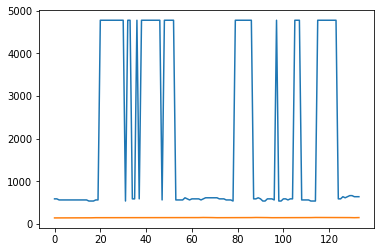

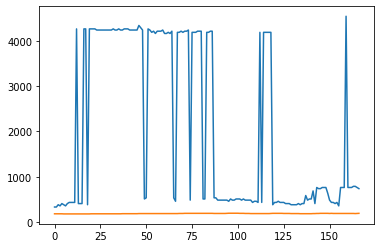

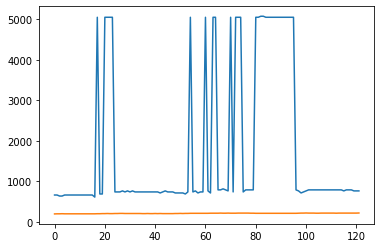

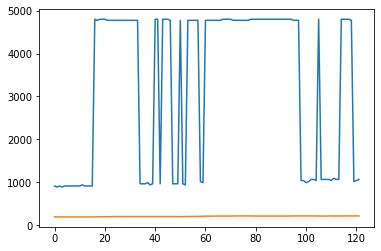

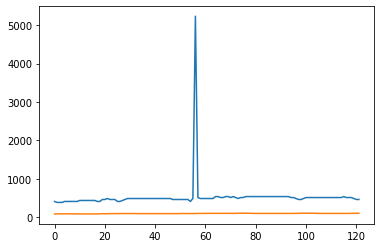

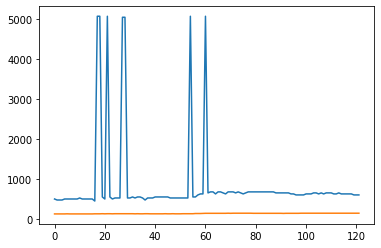

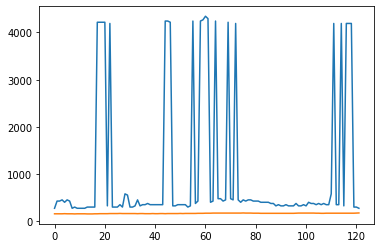

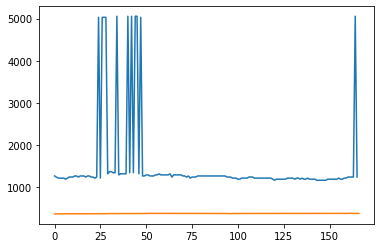

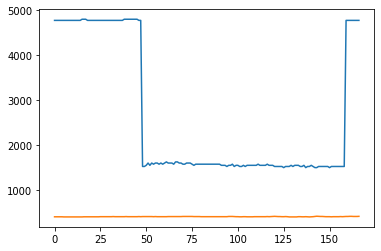

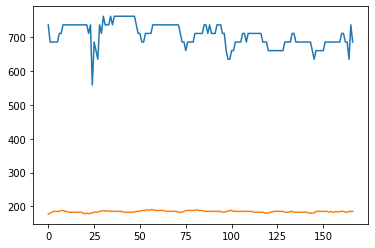

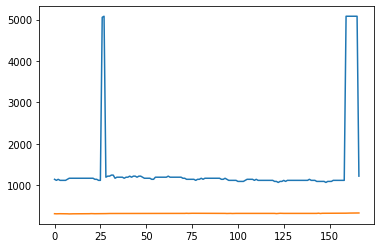

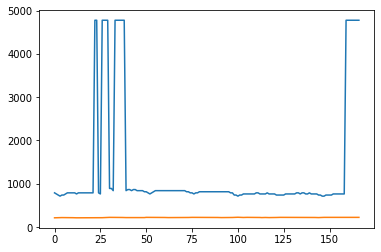

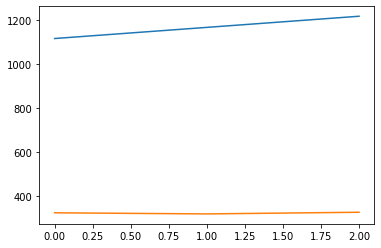

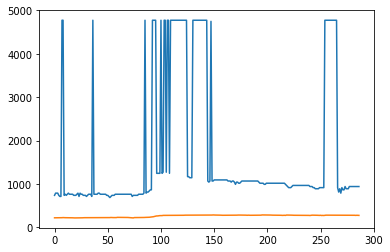

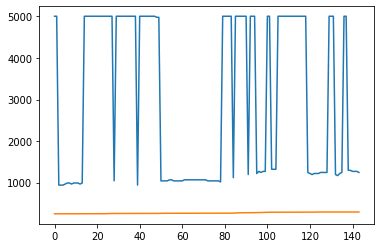

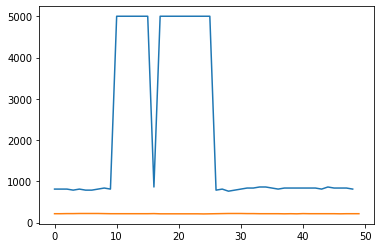

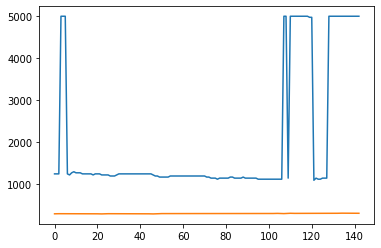

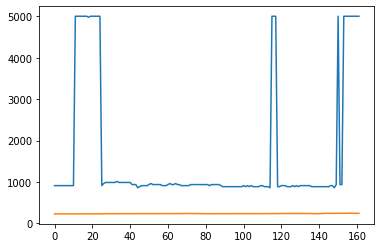

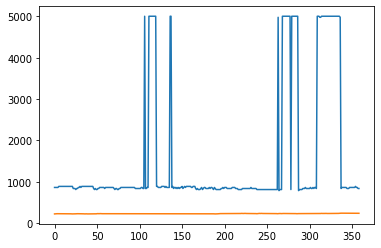

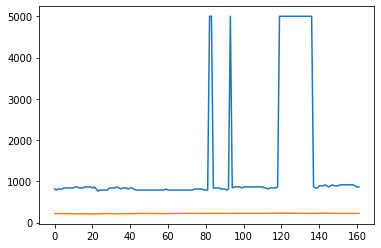

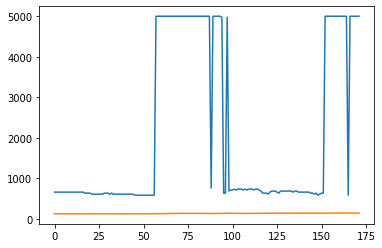

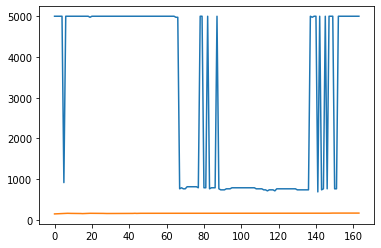

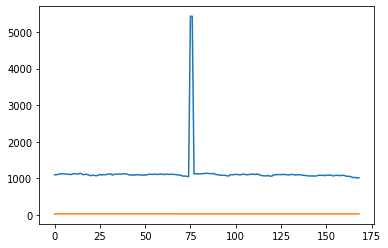

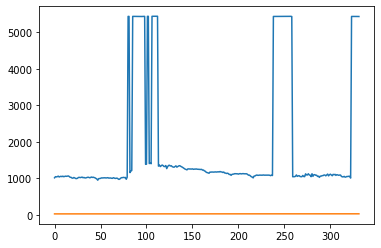

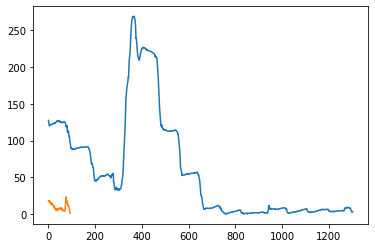

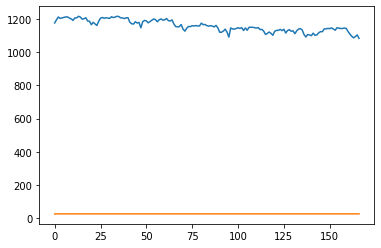

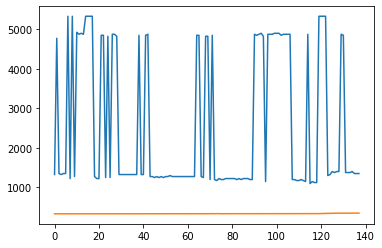

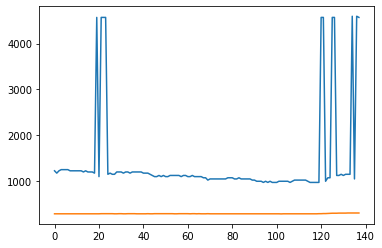

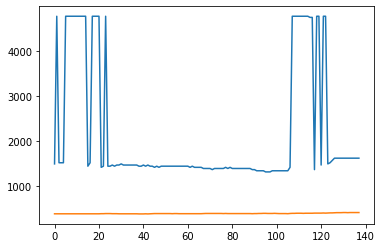

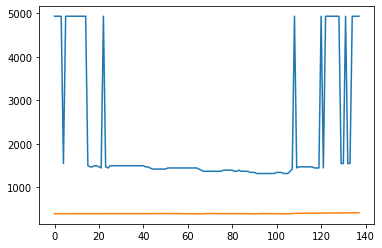

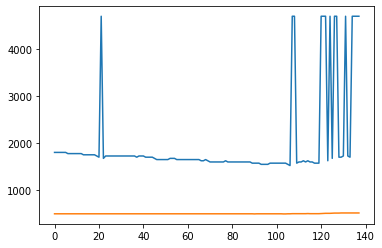

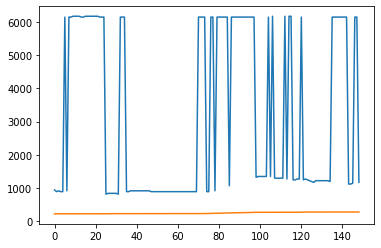

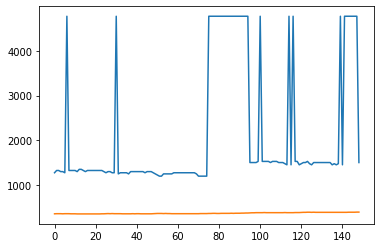

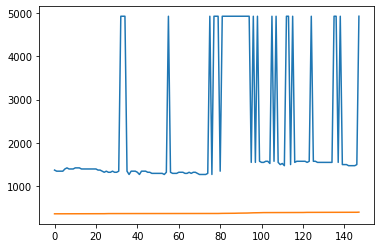

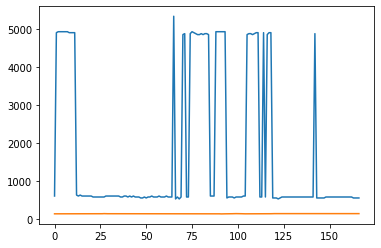

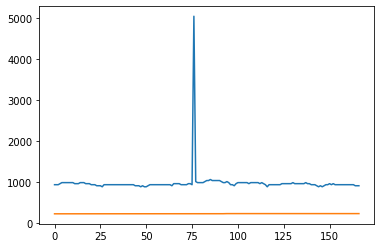

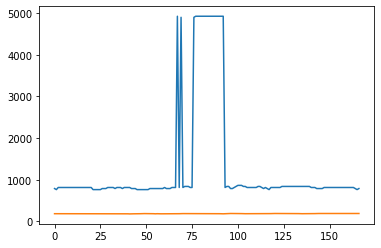

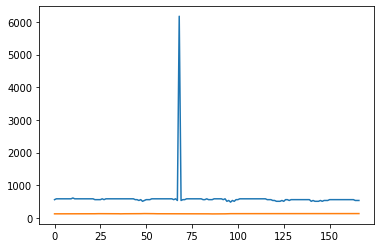

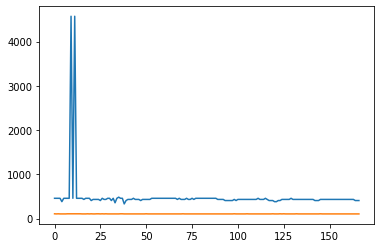

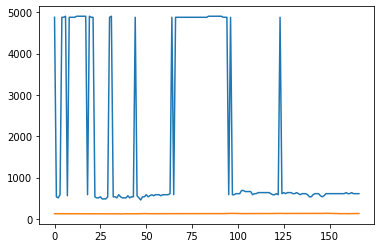

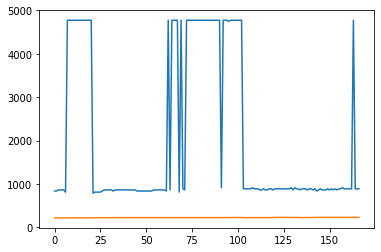

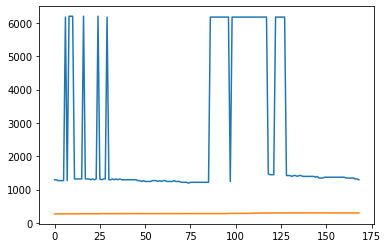

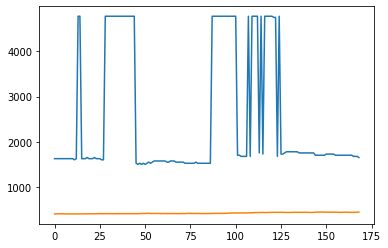

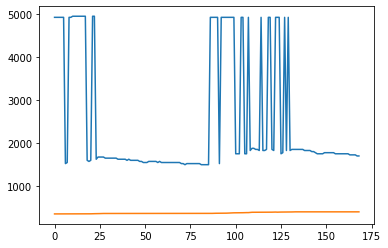

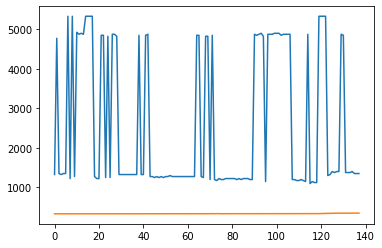

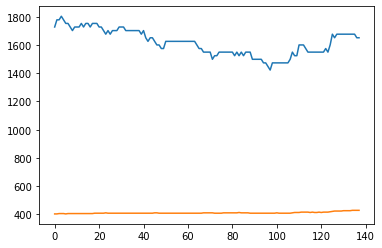

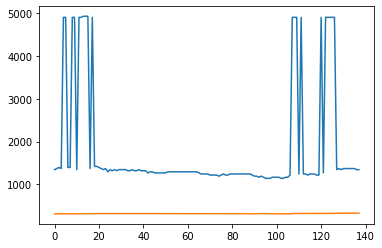

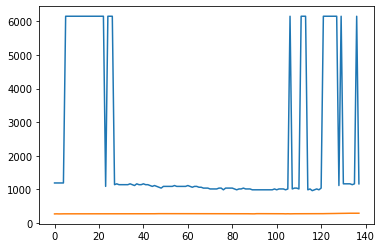

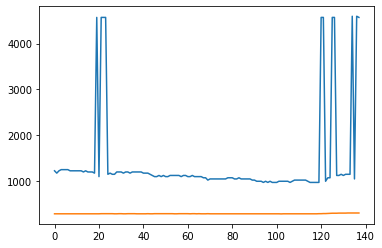

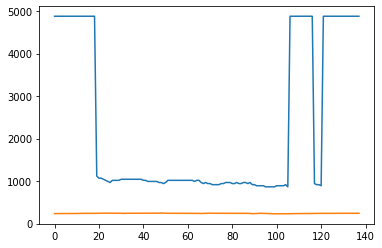

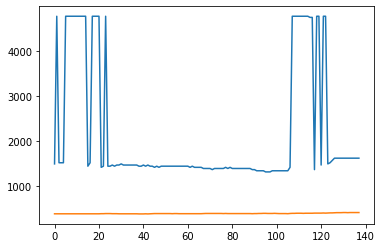

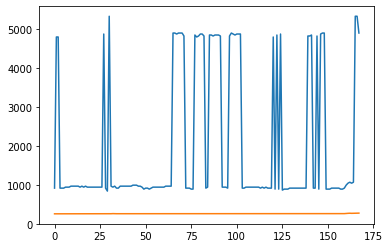

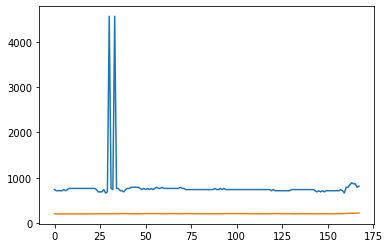

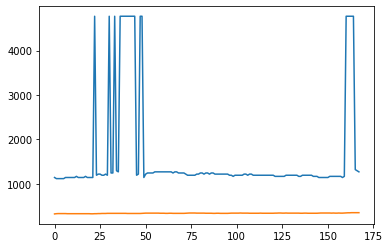

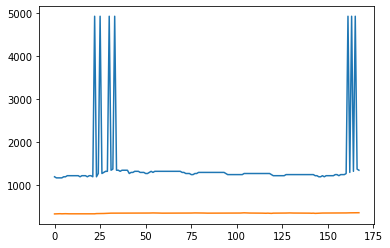

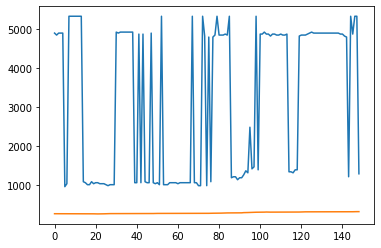

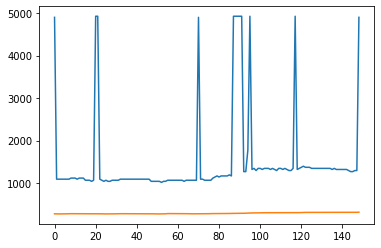

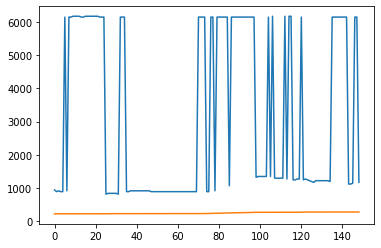

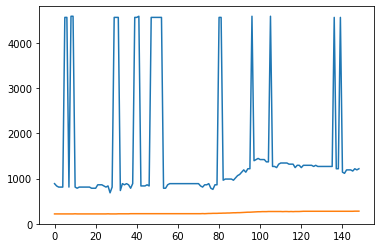

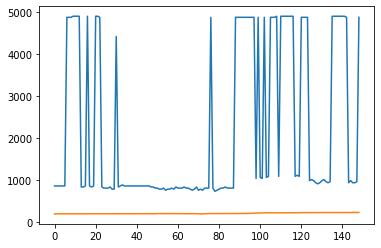

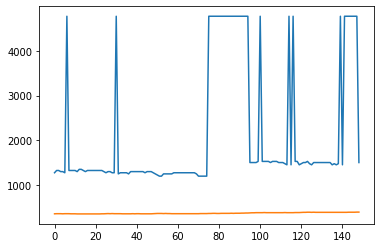

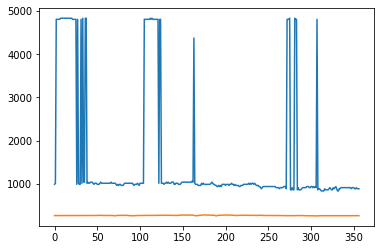

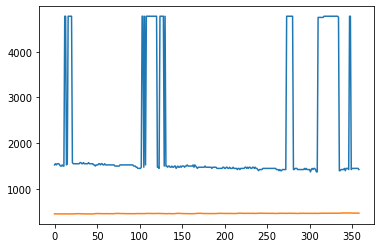

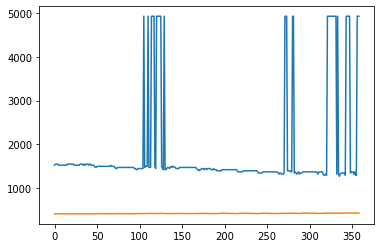

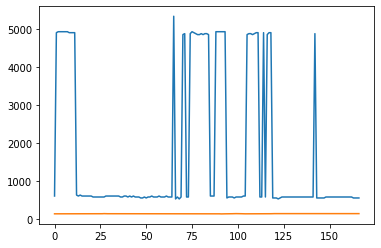

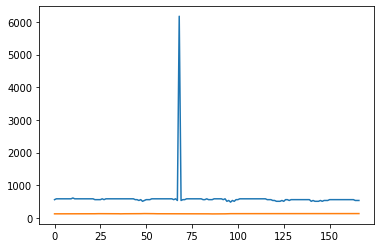

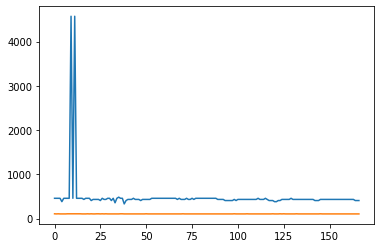

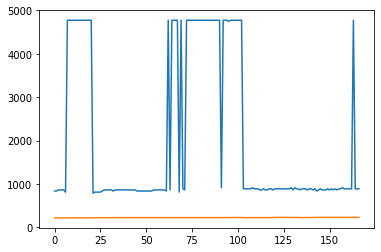

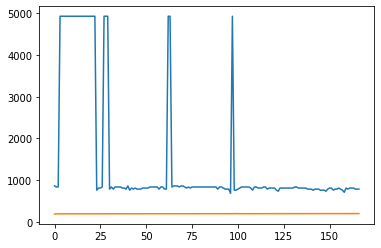

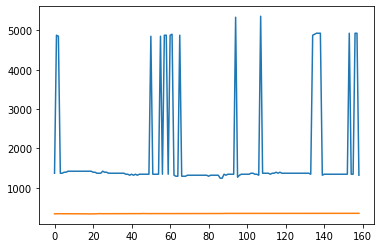

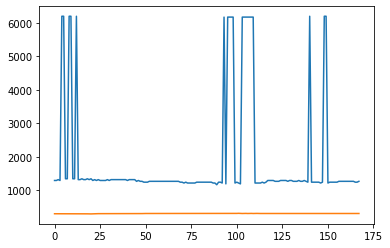

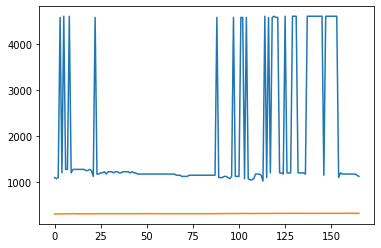

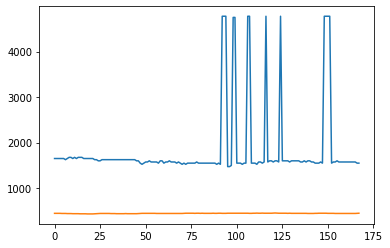

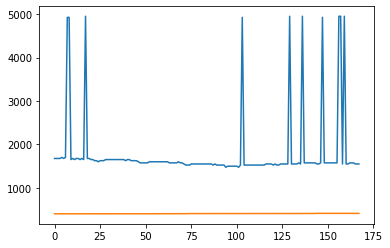

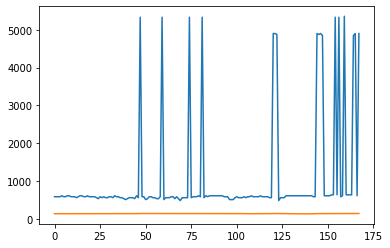

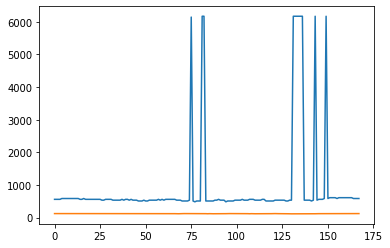

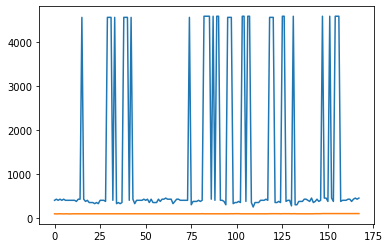

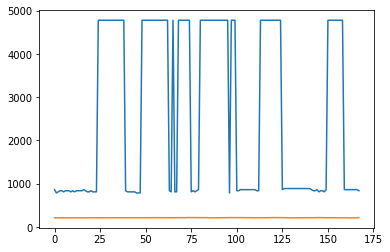

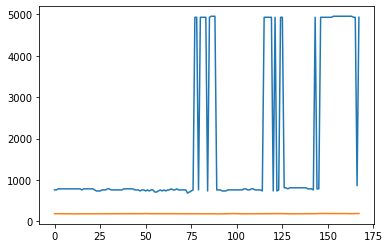

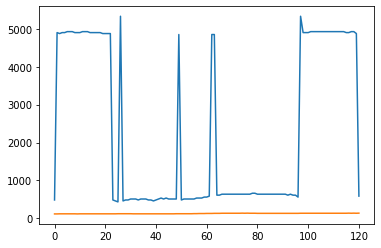

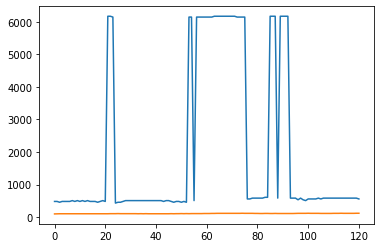

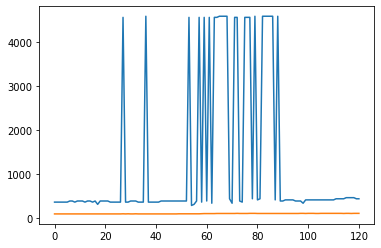

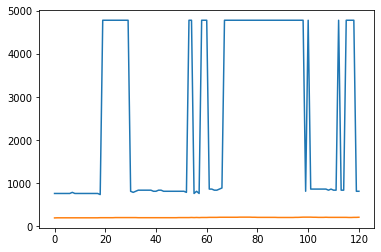

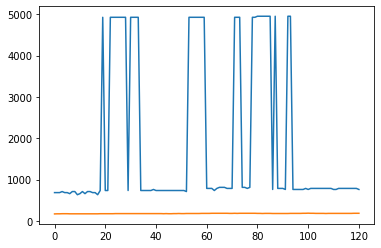

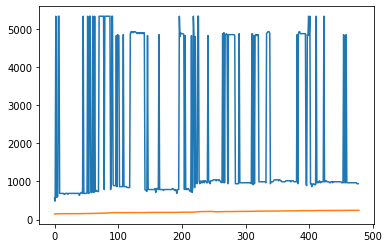

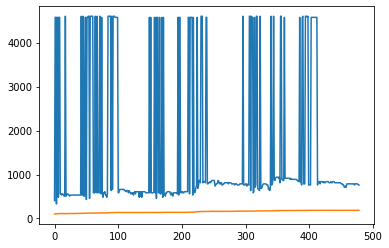

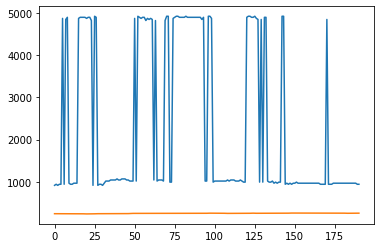

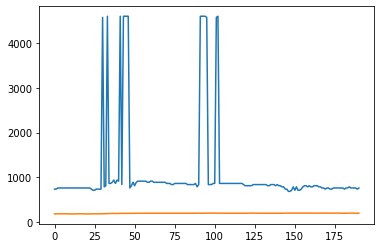

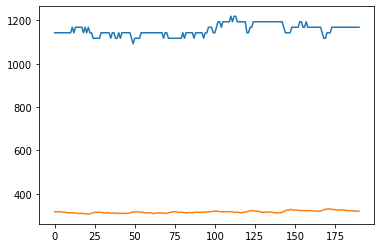

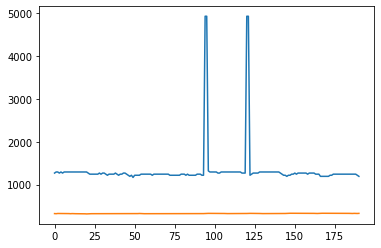

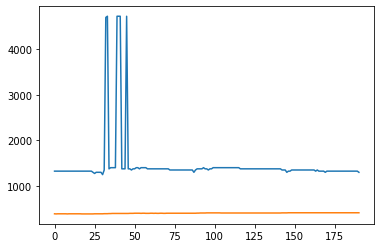

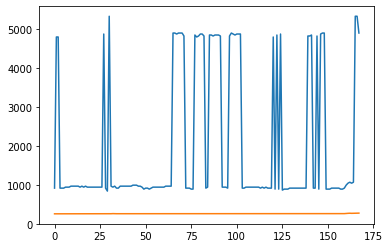

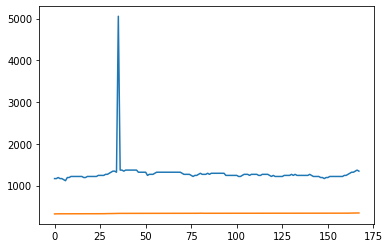

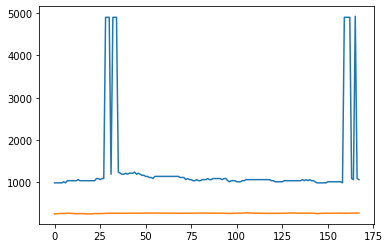

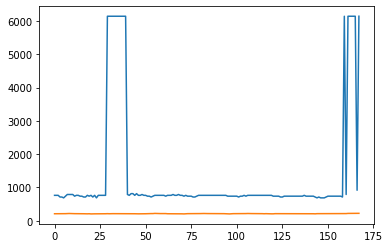

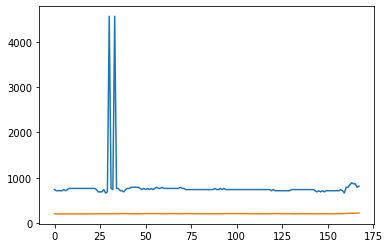

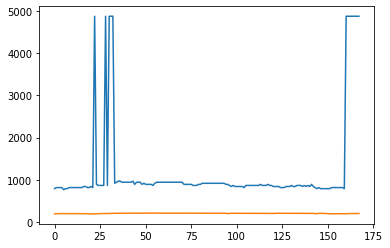

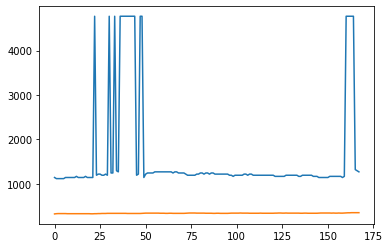

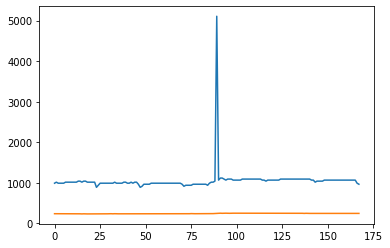

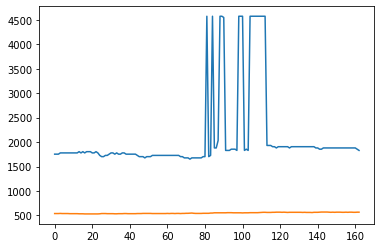

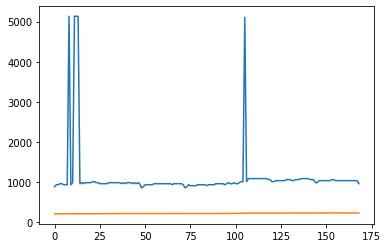

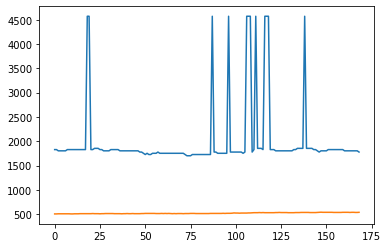

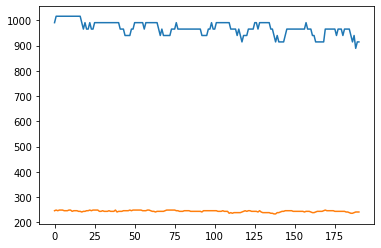

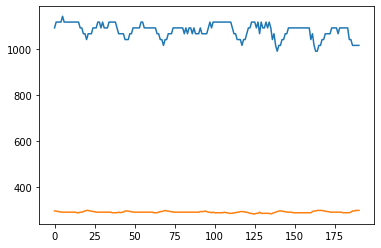

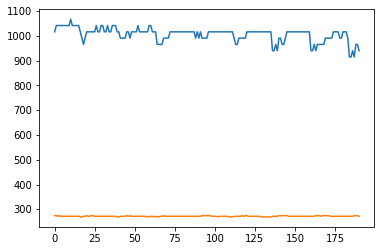

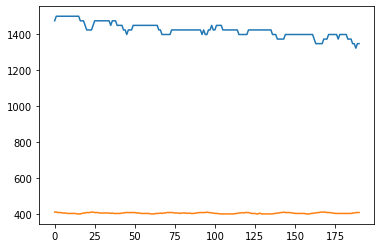

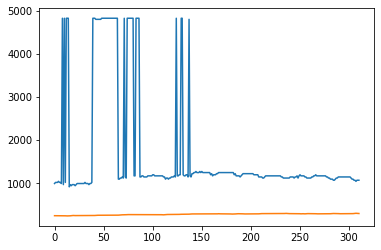

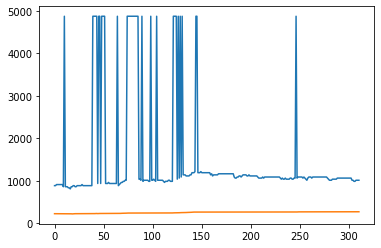

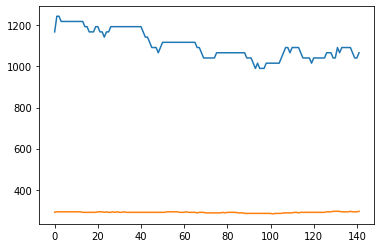

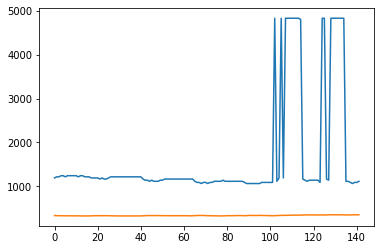

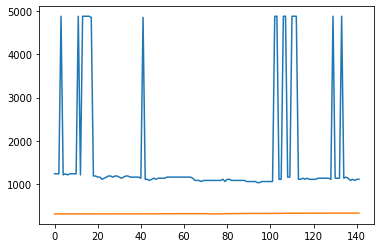

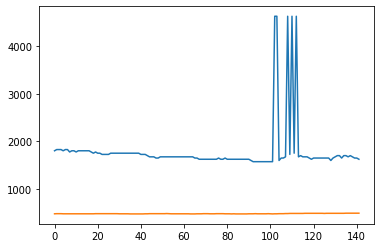

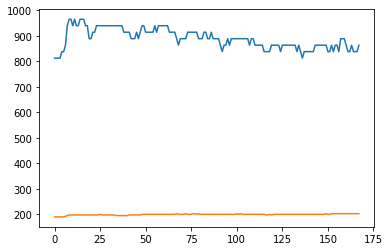

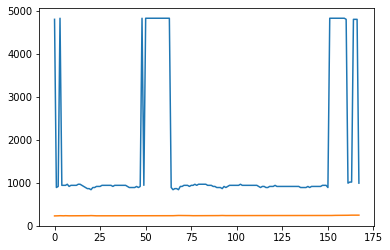

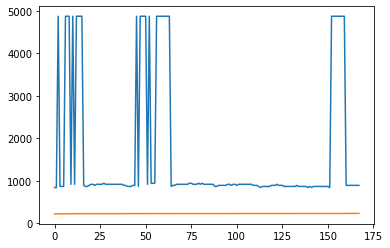

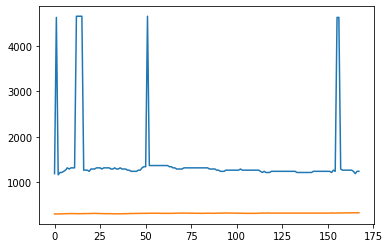

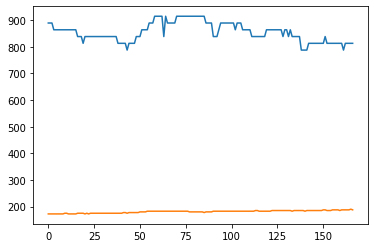

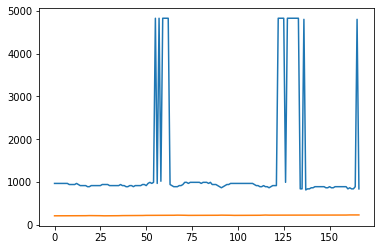

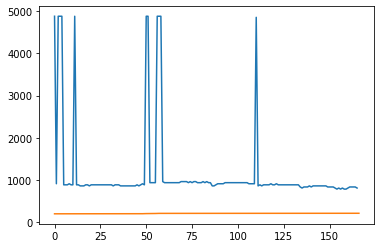

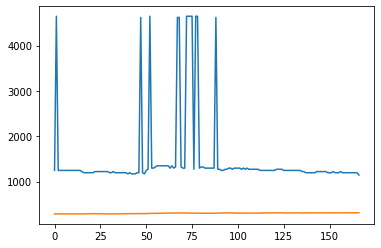

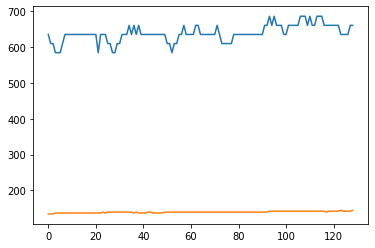

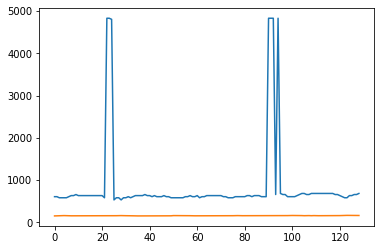

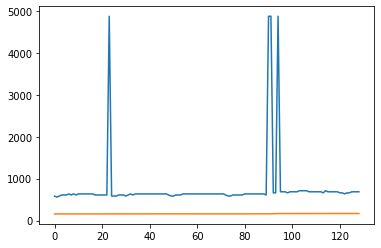

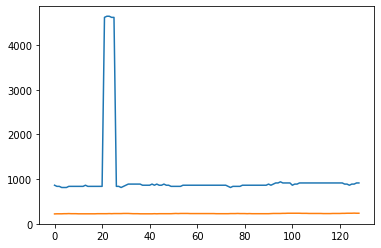

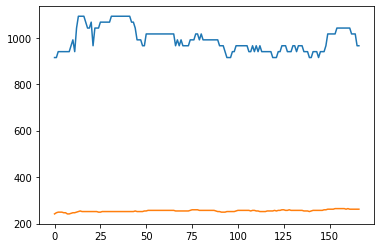

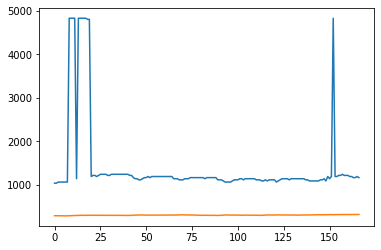

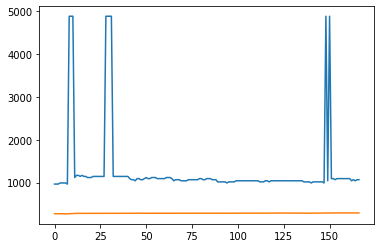

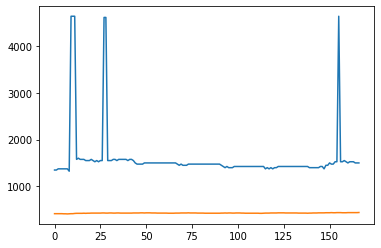

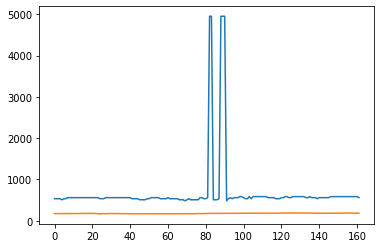

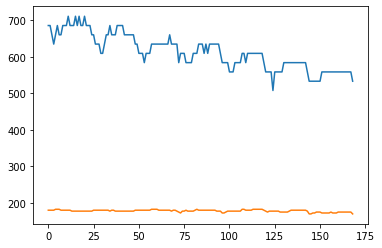

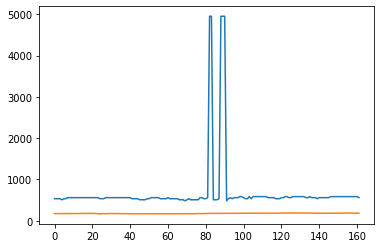

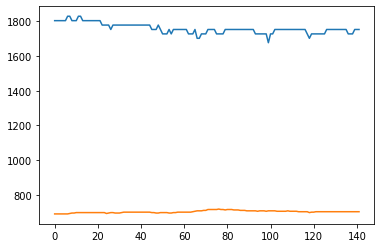

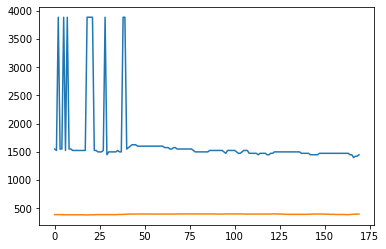

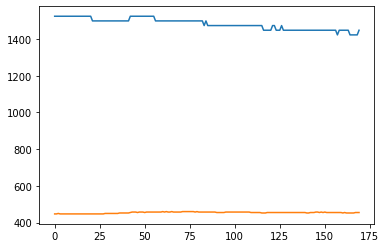

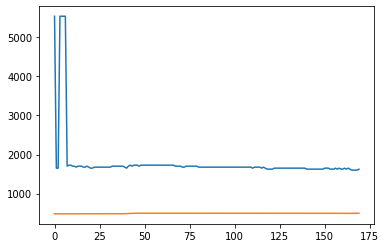

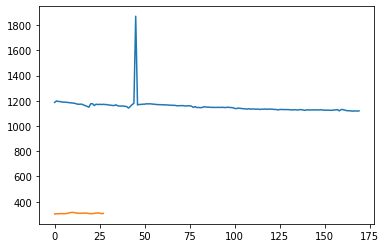

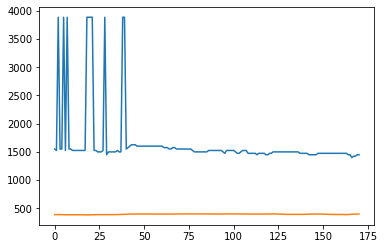

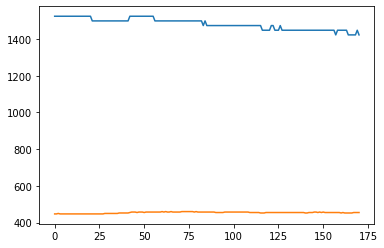

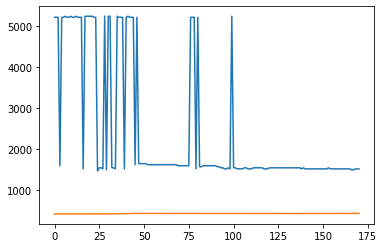

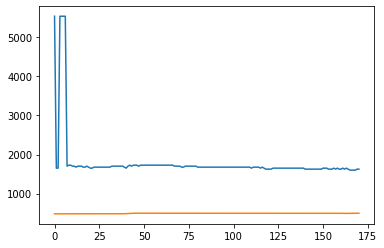

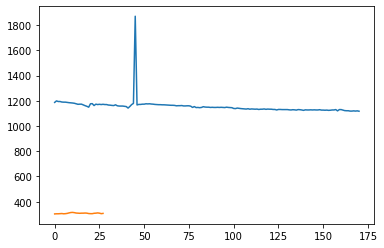

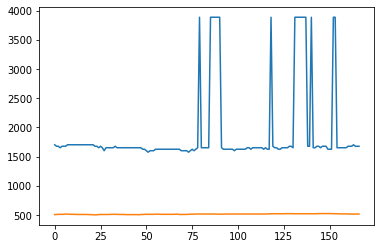

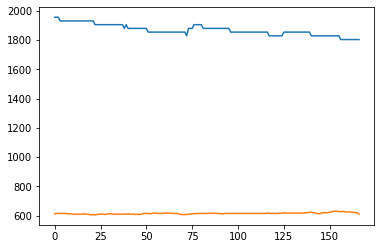

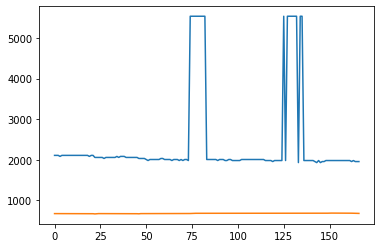

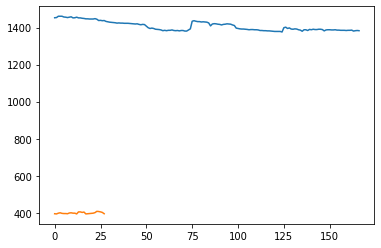

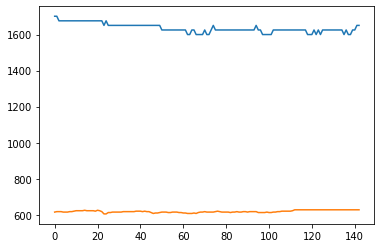

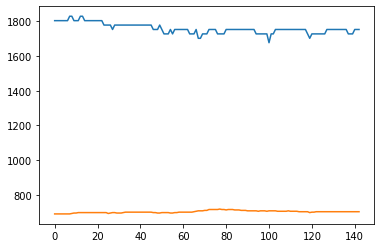

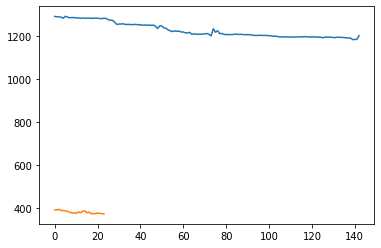

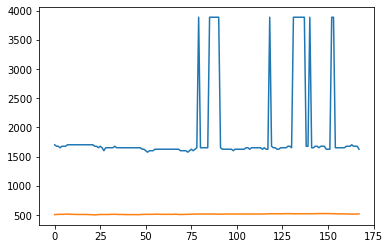

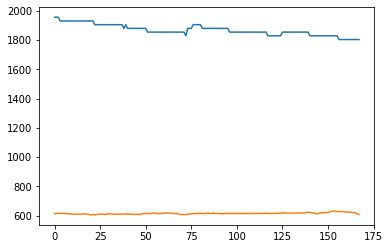

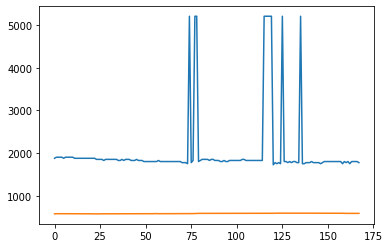

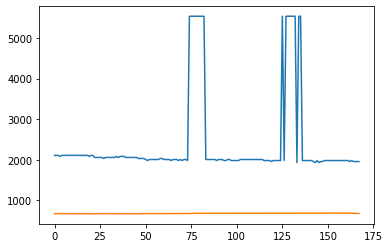

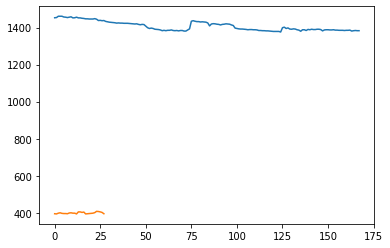

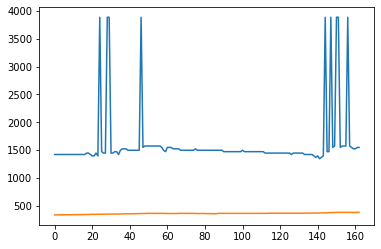

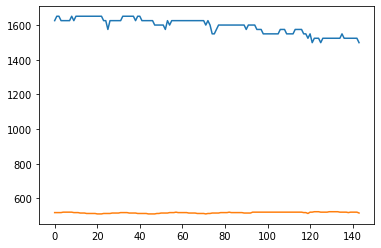

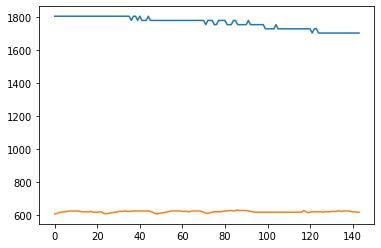

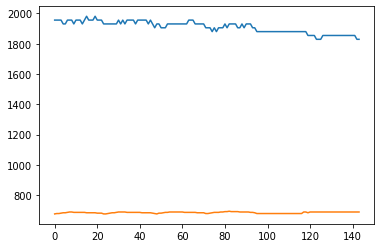

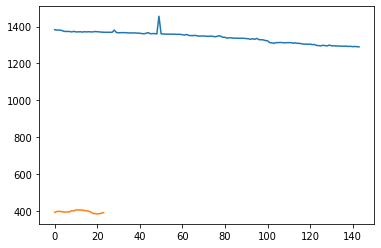

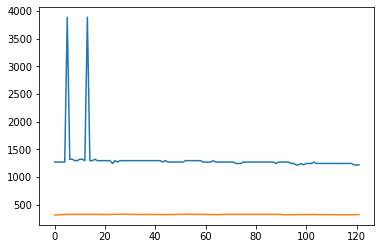

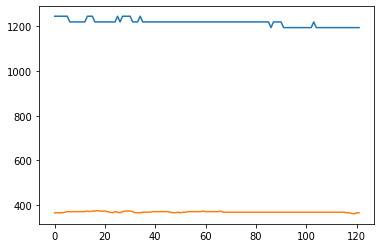

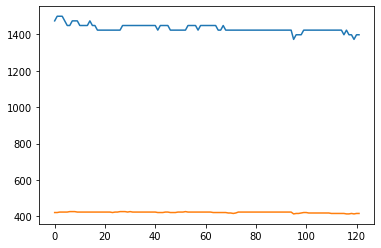

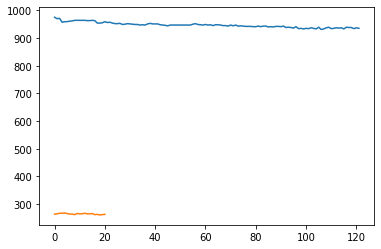

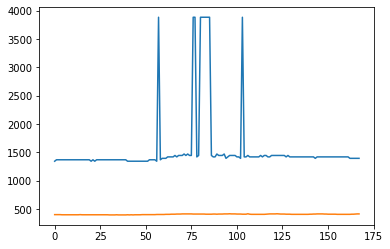

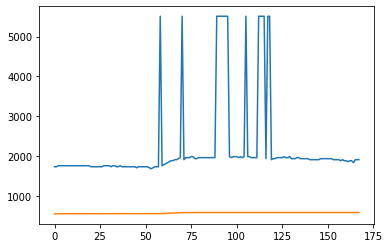

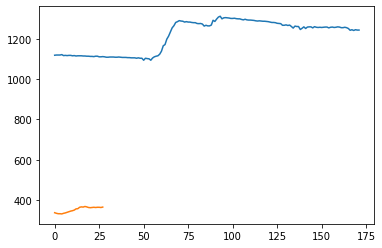

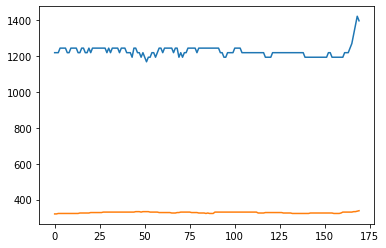

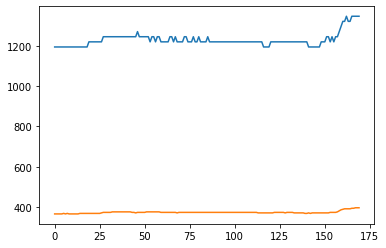

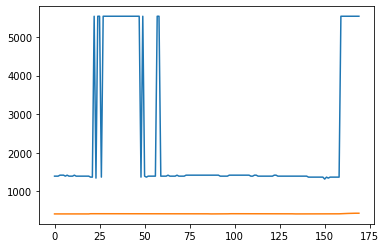

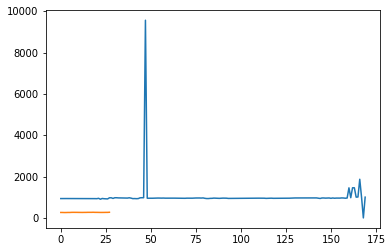

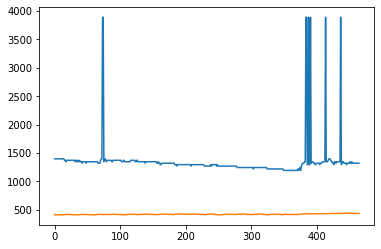

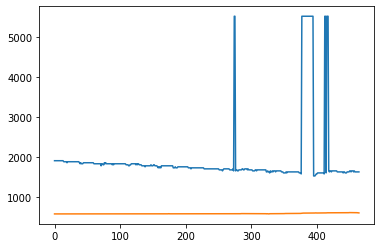

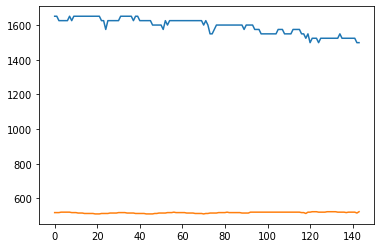

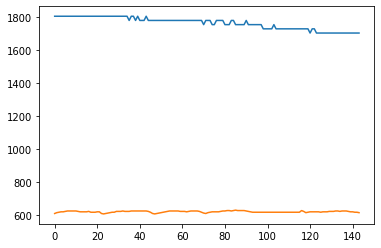

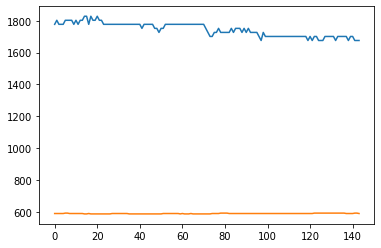

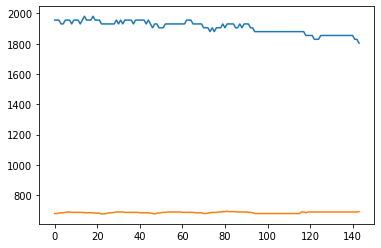

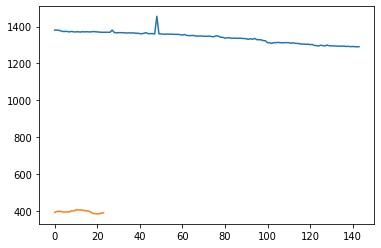

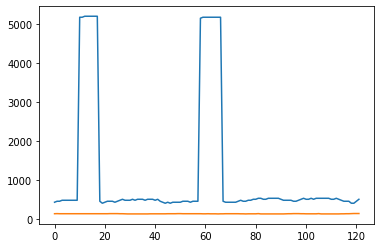

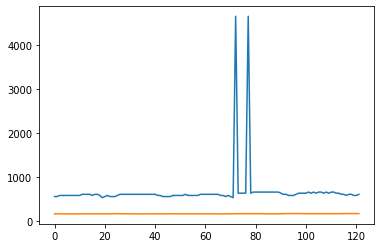

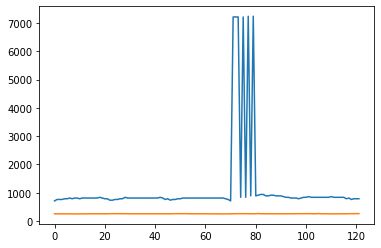

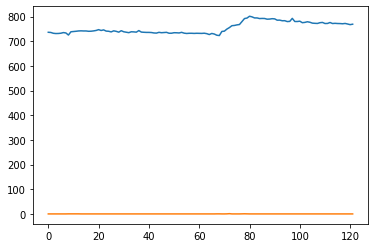

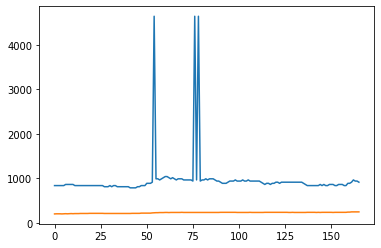

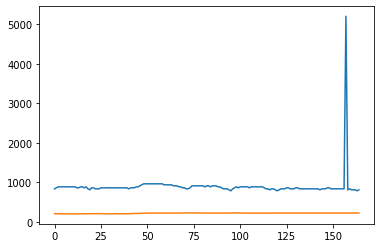

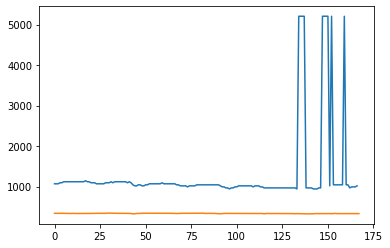

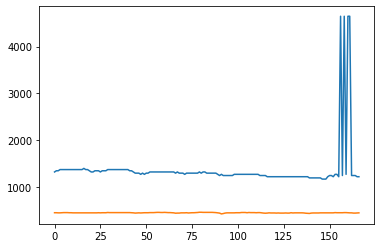

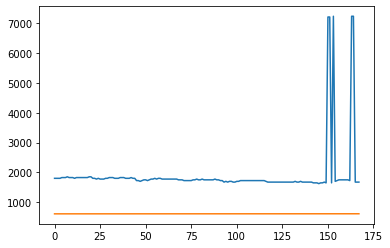

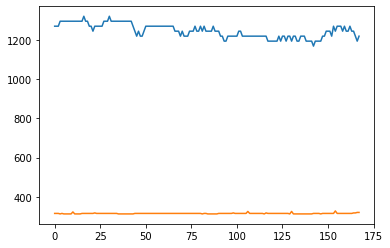

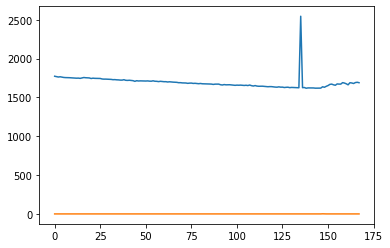

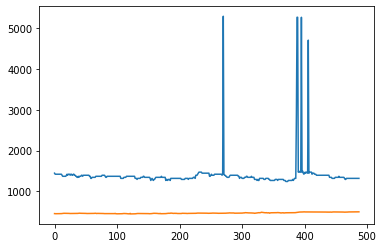

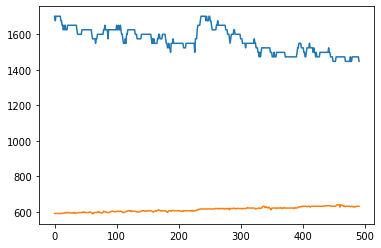

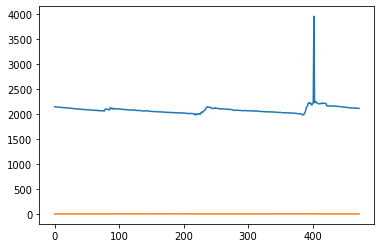

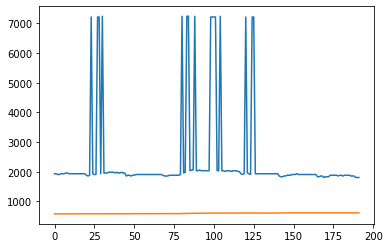

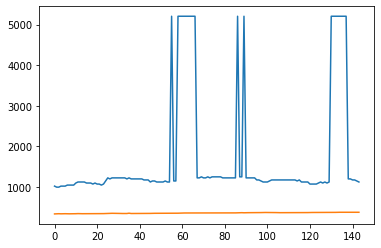

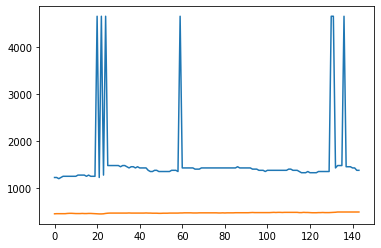

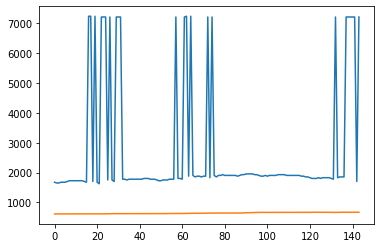

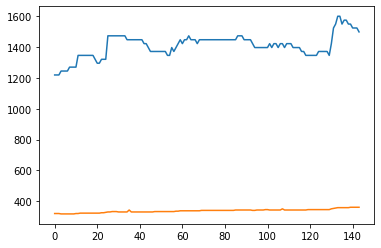

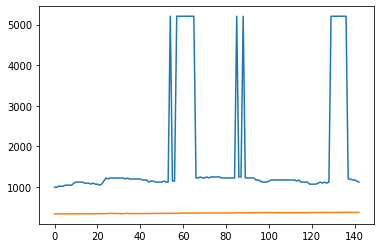

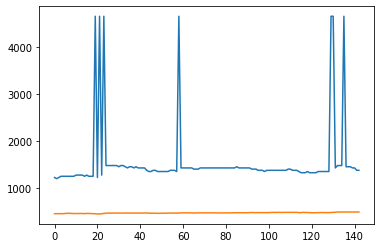

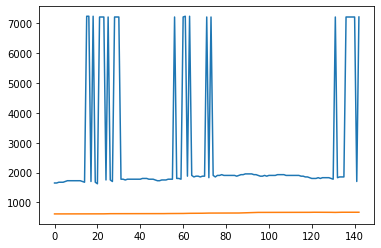

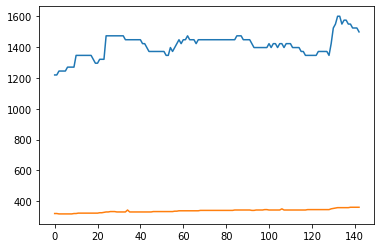

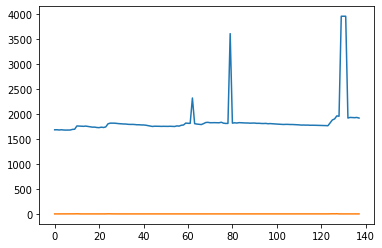

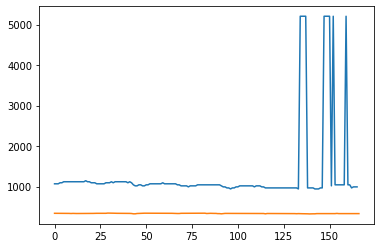

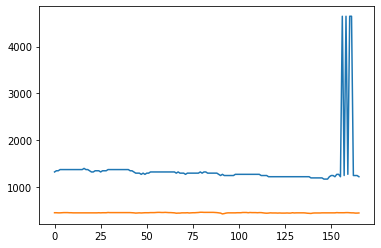

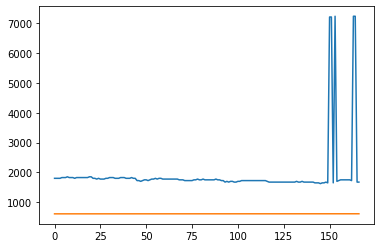

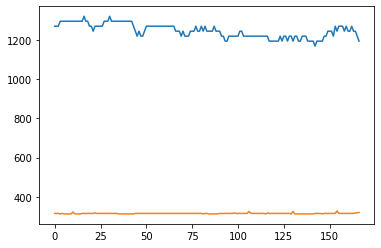

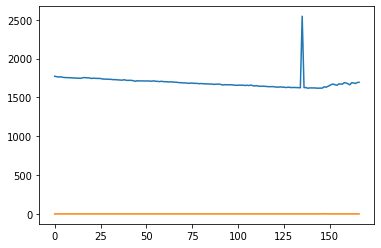

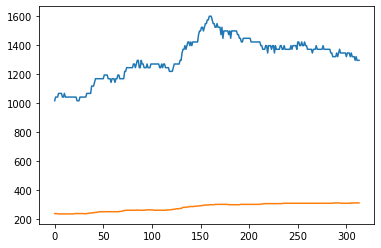

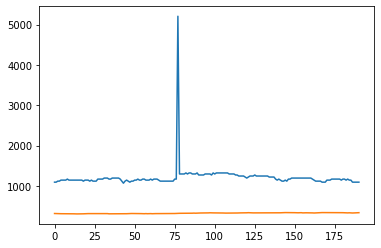

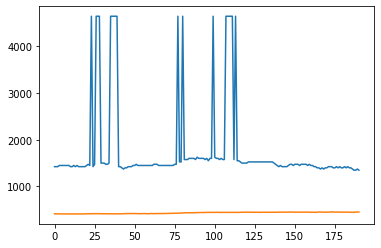

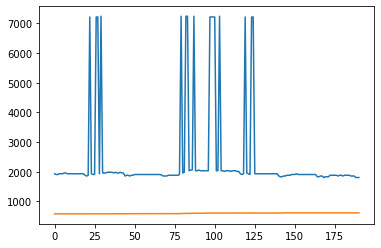

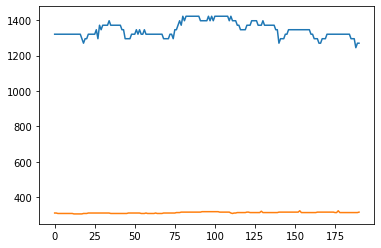

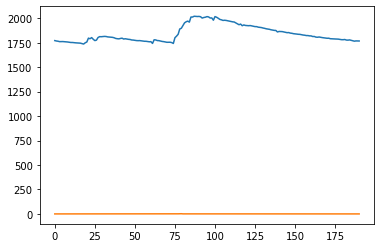

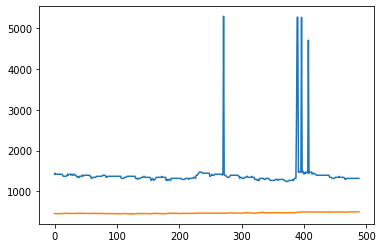

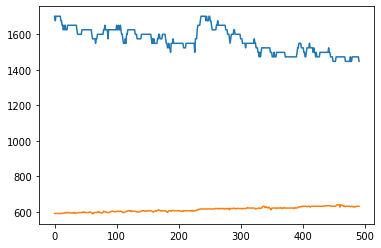

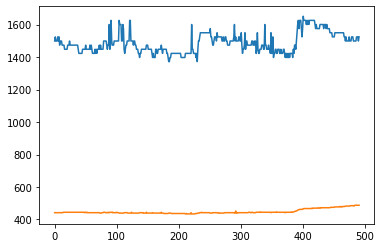

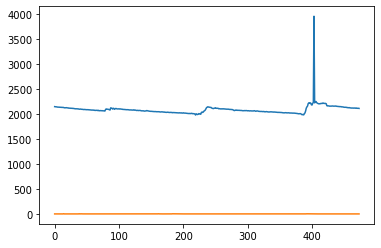

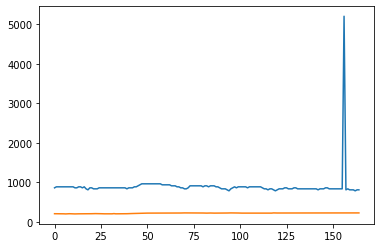

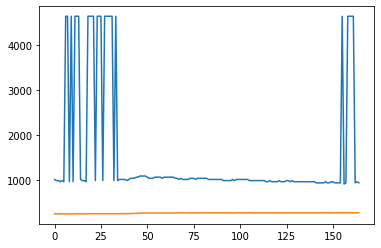

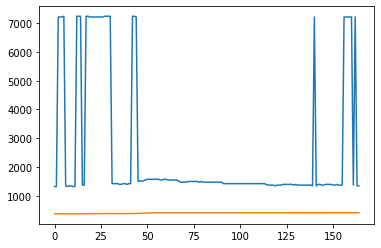

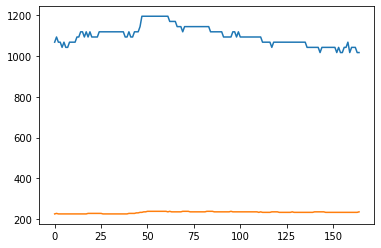

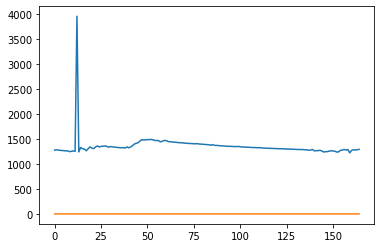

In [87]:
for i,r in res_vv.iterrows():
    if r.meso_result:
        f, ax = plt.subplots()
        for stat in r.meso_result:
            obs = r.meso_result[stat]
            sds = obs['snow_depths']
            sds = [s for s in sds if s is not None]            
            # if obs['snow_depth_unit'] == 'Millimeters':
            #     sds = [s/1000 for s in sds]
            # if obs['snow_depth_unit'] == 'Centimeters':
            #     sds = [s/100 for s in sds]
            swes = obs['swes']
            swes = [s for s in swes if s is not None]     
            plt.plot(sds)
            plt.plot(swes)  
            plt.show()     
#             if obs['snow_water_equiv_unit'] == 'Millimeters':
#                 swes = [s/1000 for s in swes]
#             if obs['snow_water_equiv_unit'] == 'Centimeters':
#                 swes = [s/100 for s in swes]
            
#             sd_delta = sds[-1] - sds[0]
#             density = swes[0]/sds[0]
#             sd_density = invert_sd(obs['phase'], obs['inc'], epsilon = epsilon_density(density))
#             us_delta = np.nanmedian(obs['uavsar_sd_delta'])
#             us_delta = np.nanmedian(sd_density)
#             plt.scatter(sd_delta, us_delta, alpha = 0.3, color = 'blue')
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
# plt.axhline(0, color = 'black', alpha = 0.2)
# plt.axvline(0, color = 'black', alpha = 0.2)
# plt.xlabel('Snotel Snow Depth Change')
# plt.ylabel('Uavsar Snow Depth Change')